In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
df=pd.read_csv('/content/drive/MyDrive/Datasets/stroke.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['gender']=le.fit_transform(df['gender'])
df['ever_married']=le.fit_transform(df['ever_married'])
df['work_type']=le.fit_transform(df['work_type'])
df['Residence_type']=le.fit_transform(df['Residence_type'])
df['smoking_status']=le.fit_transform(df['smoking_status'])


In [ ]:
df['bmi']=df['bmi'].fillna(df['bmi'].mean())


In [ ]:
df.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
X=df.iloc[:,1:-1]
X

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,2,1,228.69,36.600000,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2
2,1,80.0,0,1,1,2,0,105.92,32.500000,2
3,0,49.0,0,0,1,2,1,171.23,34.400000,3
4,0,79.0,1,0,1,3,0,174.12,24.000000,2
...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,28.893237,2
5106,0,81.0,0,0,1,3,1,125.20,40.000000,2
5107,0,35.0,0,0,1,3,0,82.99,30.600000,2
5108,1,51.0,0,0,1,2,0,166.29,25.600000,1


In [ ]:
y=df.iloc[:,-1]
y

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X)
X_scaled

array([[0.5       , 0.81689453, 0.        , ..., 0.80126489, 0.30126002,
        0.33333333],
       [0.        , 0.74365234, 0.        , ..., 0.67902317, 0.21298095,
        0.66666667],
       [0.5       , 0.97558594, 0.        , ..., 0.23451205, 0.25429553,
        0.66666667],
       ...,
       [0.        , 0.42626953, 0.        , ..., 0.12865848, 0.2325315 ,
        0.66666667],
       [0.5       , 0.62158203, 0.        , ..., 0.51320284, 0.17525773,
        0.33333333],
       [0.        , 0.53613281, 0.        , ..., 0.13922999, 0.18213058,
        0.        ]])

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=1)
X_train.shape

(3577, 10)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dec=DecisionTreeClassifier(criterion='entropy')
dec.fit(X_train,y_train)


DecisionTreeClassifier(criterion='entropy')

In [ ]:
y_pred=dec.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 1, 0])

In [ ]:
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay,classification_report

print(accuracy_score(y_test,y_pred)*100)
print(classification_report(y_test,y_pred))

90.8675799086758
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1450
           1       0.18      0.19      0.19        83

    accuracy                           0.91      1533
   macro avg       0.57      0.57      0.57      1533
weighted avg       0.91      0.91      0.91      1533



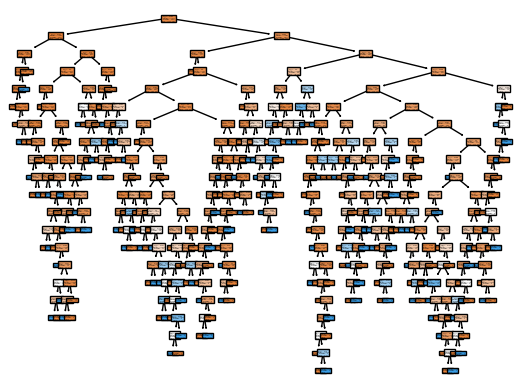

<Figure size 1000x1000 with 0 Axes>

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt
tree.plot_tree(dec,filled=True)
plt.figure(figsize=(10,10))
plt.show()

In [ ]:
y_new=dec.predict(scaler.transform([[1,67,0,1,1,2,1,228.69,36.6,1]]))
y_new

#1	67.0	0	1	1	2	1	228.69	36.600000	1

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([1])

In [ ]:
#Knn Algorithm

knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_predic=knn.predict(X_test)
y_predic

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
print(accuracy_score(y_test,y_predic)*100)
print(classification_report(y_test,y_predic))

93.34637964774952
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      1450
           1       0.12      0.04      0.06        83

    accuracy                           0.93      1533
   macro avg       0.53      0.51      0.51      1533
weighted avg       0.90      0.93      0.92      1533



In [ ]:
#svm Algorithm

svc=SVC(kernel='linear')# or we can use poly, rbf, linear
svc.fit(X_train,y_train)

SVC(kernel='linear')

In [ ]:
y_predict=svc.predict(X_test)
y_predict

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
print(accuracy_score(y_test,y_predict)*100)
print(classification_report(y_test,y_predict))

94.58577951728635
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1450
           1       0.00      0.00      0.00        83

    accuracy                           0.95      1533
   macro avg       0.47      0.50      0.49      1533
weighted avg       0.89      0.95      0.92      1533



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Naivebyes

nb=GaussianNB()
nb.fit(X_train,y_train)

GaussianNB()

In [ ]:
y_prediction=nb.predict(X_test)
y_prediction

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
print(accuracy_score(y_test,y_prediction)*100)
print(classification_report(y_test,y_prediction))

87.01891715590345
              precision    recall  f1-score   support

           0       0.97      0.90      0.93      1450
           1       0.19      0.43      0.27        83

    accuracy                           0.87      1533
   macro avg       0.58      0.66      0.60      1533
weighted avg       0.92      0.87      0.89      1533



In [ ]:
import warnings
warnings.filterwarnings('ignore')

************* DecisionTreeClassifier() **************
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1450
           1       0.15      0.13      0.14        83

    accuracy                           0.91      1533
   macro avg       0.55      0.54      0.55      1533
weighted avg       0.91      0.91      0.91      1533

************* KNeighborsClassifier() **************
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1450
           1       0.10      0.01      0.02        83

    accuracy                           0.94      1533
   macro avg       0.52      0.50      0.50      1533
weighted avg       0.90      0.94      0.92      1533

************* SVC() **************
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1450
           1       0.00      0.00      0.00        83

    accuracy                           0.

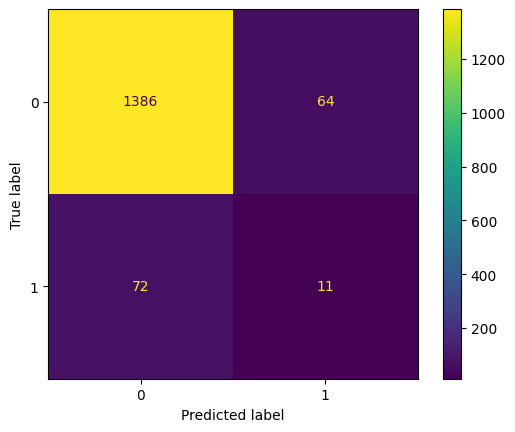

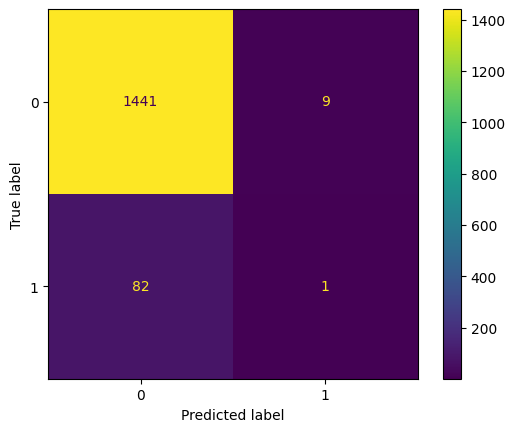

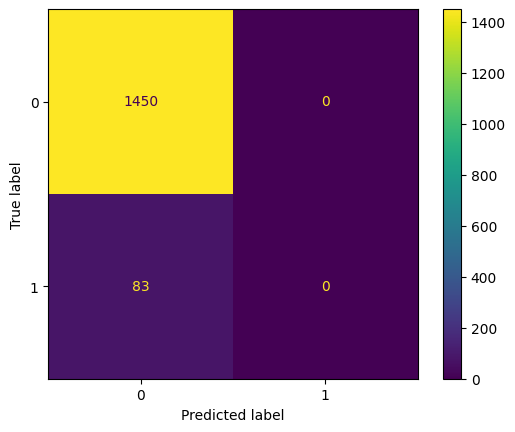

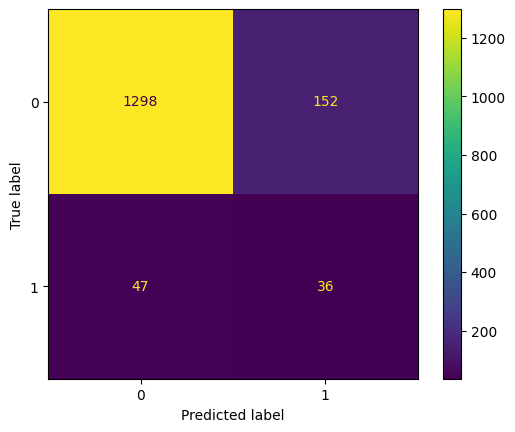

In [ ]:
#How we can get all the algorithm in a single step using forloop

dec=DecisionTreeClassifier()
knn=KNeighborsClassifier()
svc=SVC()
nb=GaussianNB()
models=[dec,knn,svc,nb]

for model in models:
  print('*************',model,'**************')
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  print(classification_report(y_test,y_pred))
  print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))


In [ ]:
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [ ]:
#Here we can see that the dataset is unbalanced data there are more value for 0, which is known as no stroke
#but for 1 which is metioned to people having strokes it is less.


In [ ]:
#Handling imbalanced data

#imblearn

from imblearn.over_sampling import SMOTE

#SMOTE= Synthetic Minority Oversampling Technique

os=SMOTE()
X_os,y_os=os.fit_resample(X,y)


In [ ]:
y_os.value_counts()

1    4861
0    4861
Name: stroke, dtype: int64

In [ ]:
X_osScaled=scaler.fit_transform(X_os)
X_osScaled

array([[0.5       , 0.81689453, 0.        , ..., 0.80126489, 0.30126002,
        0.33333333],
       [0.        , 0.74365234, 0.        , ..., 0.67902317, 0.21298095,
        0.66666667],
       [0.5       , 0.97558594, 0.        , ..., 0.23451205, 0.25429553,
        0.66666667],
       ...,
       [0.5       , 0.85220206, 1.        , ..., 0.59372939, 0.30215898,
        0.66666667],
       [0.        , 0.58822752, 0.        , ..., 0.0870906 , 0.13185834,
        0.33333333],
       [0.        , 0.97558594, 0.        , ..., 0.08675131, 0.1512893 ,
        0.        ]])

In [ ]:
X_ostrain,X_ostext,y_ostrain,y_ostest=train_test_split(X_osScaled,y_os,test_size=0.3,random_state=1)


In [ ]:
X_ostrain.shape,X_ostext.shape,y_ostrain.shape,y_ostest.shape

((6805, 10), (2917, 10), (6805,), (2917,))

************* DecisionTreeClassifier(criterion='entropy', max_depth=4) **************
              precision    recall  f1-score   support

           0       0.89      0.69      0.78      1453
           1       0.75      0.92      0.82      1464

    accuracy                           0.80      2917
   macro avg       0.82      0.80      0.80      2917
weighted avg       0.82      0.80      0.80      2917

[1]
************* KNeighborsClassifier() **************
              precision    recall  f1-score   support

           0       0.92      0.80      0.86      1453
           1       0.83      0.93      0.88      1464

    accuracy                           0.87      2917
   macro avg       0.88      0.87      0.87      2917
weighted avg       0.88      0.87      0.87      2917

[1]
************* SVC() **************
              precision    recall  f1-score   support

           0       0.85      0.79      0.82      1453
           1       0.81      0.87      0.84      1464

 

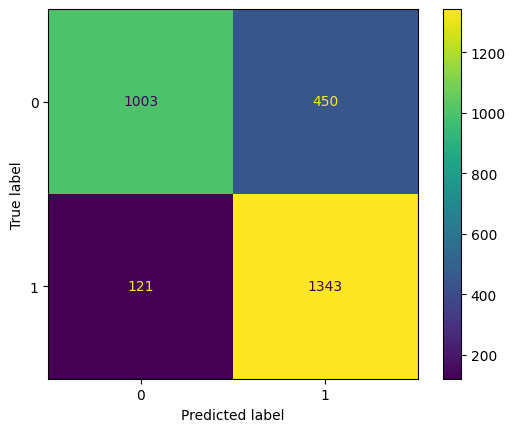

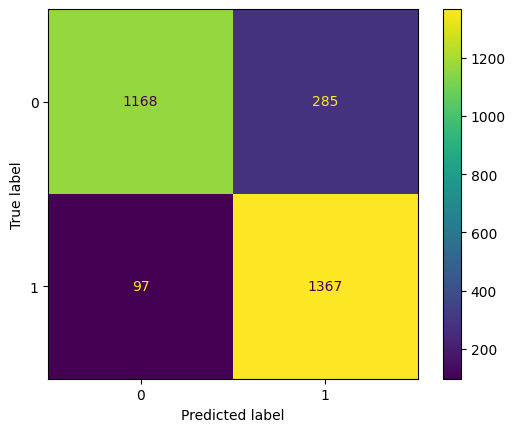

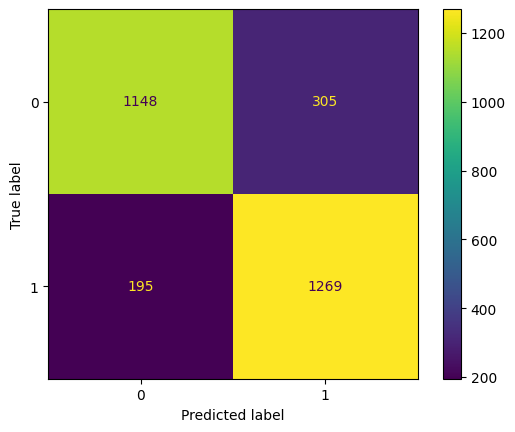

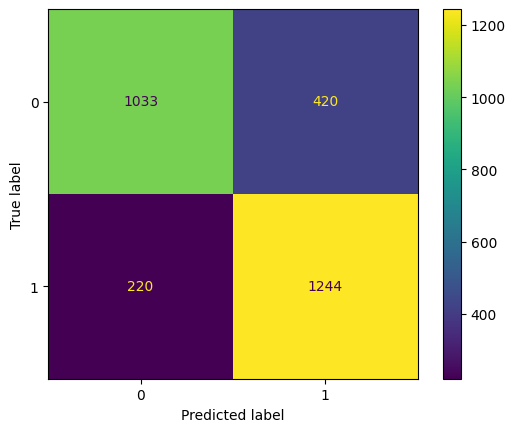

In [ ]:
dec1=DecisionTreeClassifier(criterion='entropy',max_depth=4)
knn1=KNeighborsClassifier()
svc1=SVC()
nb1=GaussianNB()
models=[dec1,knn1,svc1,nb1]

for model in models:
  print('*************',model,'**************')
  model.fit(X_ostrain,y_ostrain)
  y_pred_os=model.predict(X_ostext)
  y_new=model.predict(scaler.transform([[1,67,0,1,1,2,1,228.69,36.6,1]]))

  print(classification_report(y_ostest,y_pred_os))
  print(y_new)
  print(ConfusionMatrixDisplay.from_predictions(y_ostest,y_pred_os))

In [ ]:
#Udersampling
from imblearn.under_sampling import RandomUnderSampler
us=RandomUnderSampler()
X_us,y_us=us.fit_resample(X,y)

In [ ]:
y_us.value_counts()

0    249
1    249
Name: stroke, dtype: int64

In [ ]:
X_us

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,13.0,0,0,0,3,1,74.19,31.100000,1
1,0,27.0,0,0,0,2,1,61.80,26.800000,1
2,1,47.0,1,0,1,2,1,110.25,44.300000,2
3,1,71.0,1,0,1,3,0,97.57,26.900000,0
4,0,49.0,0,0,1,2,1,125.30,29.700000,1
...,...,...,...,...,...,...,...,...,...,...
493,1,57.0,0,0,1,2,0,84.96,36.700000,0
494,0,14.0,0,0,0,4,0,57.93,30.900000,0
495,0,75.0,0,0,1,3,0,78.80,29.300000,1
496,1,71.0,1,0,1,3,0,87.80,28.893237,0


In [ ]:
X_us_scaled=scaler.fit_transform(X_us)
X_us_scaled

array([[0.5       , 0.15606654, 0.        , ..., 0.08384733, 0.32129278,
        0.33333333],
       [0.        , 0.32729941, 0.        , ..., 0.02638779, 0.23954373,
        0.33333333],
       [0.5       , 0.57191781, 1.        , ..., 0.25107824, 0.57224335,
        0.66666667],
       ...,
       [0.        , 0.91438356, 0.        , ..., 0.10522655, 0.28707224,
        0.33333333],
       [0.5       , 0.86545988, 1.        , ..., 0.14696471, 0.2793391 ,
        0.        ],
       [0.        , 0.95107632, 0.        , ..., 0.10527292, 0.1026616 ,
        0.        ]])

In [ ]:
X_us_train,X_us_test,y_us_train,y_us_test=train_test_split(X_us_scaled,y_us,test_size=.3,random_state=1)


In [ ]:
dec2=DecisionTreeClassifier(criterion='entropy',max_depth=4)
knn2=KNeighborsClassifier(n_neighbors=3)
svm2=SVC()
nb2=GaussianNB()

models=[dec2,knn2,svm2,nb2]

for model in models:
  print('*****************',model,'*********************8')
  model.fit(X_us_train,y_us_train)
  y_pred_us=model.predict(X_us_test)
  y_new_us=model.predict(scaler.transform([[1,67,0,1,1,2,1,228.69,36.6,1]]))
  print(y_new_us)
  print(classification_report(y_us_test,y_pred_us))

***************** DecisionTreeClassifier(criterion='entropy', max_depth=4) *********************8
[1]
              precision    recall  f1-score   support

           0       0.69      0.75      0.72        68
           1       0.78      0.72      0.75        82

    accuracy                           0.73       150
   macro avg       0.73      0.73      0.73       150
weighted avg       0.74      0.73      0.73       150

***************** KNeighborsClassifier(n_neighbors=3) *********************8
[1]
              precision    recall  f1-score   support

           0       0.69      0.71      0.70        68
           1       0.75      0.73      0.74        82

    accuracy                           0.72       150
   macro avg       0.72      0.72      0.72       150
weighted avg       0.72      0.72      0.72       150

***************** SVC() *********************8
[1]
              precision    recall  f1-score   support

           0       0.75      0.76      0.76        68
   